In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
#from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [2]:
!wget https://assets.gezdev.com/banana/banana_21-23.tar.gz

--2021-10-23 16:18:28--  https://assets.gezdev.com/banana/banana_21-23.tar.gz
Resolving assets.gezdev.com (assets.gezdev.com)... 157.230.39.189
Connecting to assets.gezdev.com (assets.gezdev.com)|157.230.39.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9801706 (9.3M) [application/octet-stream]
Saving to: ‘banana_21-23.tar.gz’

banana_21-23.tar.gz 100%[===================>]   9.35M  24.7MB/s    in 0.4s    

2021-10-23 16:18:29 (24.7 MB/s) - ‘banana_21-23.tar.gz’ saved [9801706/9801706]



In [3]:
!tar -xf banana_21-23.tar.gz

In [4]:
print("Train set:  ", len(os.listdir("/content/banana_21-23/IMG")))
print("Train masks:", len(os.listdir("/content/banana_21-23/ANNO")))

Train set:   129
Train masks: 129


In [14]:
banana_ids = []
paths = []
for dirname, _, filenames in os.walk('/content/banana_21-23/IMG'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        banana_id = filename.split(".")[0]
        banana_ids.append(banana_id)

d = {"id": banana_ids, "banana_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

banana_path
id                                                                    
22_10_2021_20-30-07  /content/banana_21-23/IMG/22_10_2021_20-30-07....
22_10_2021_09-30-07  /content/banana_21-23/IMG/22_10_2021_09-30-07....
23_10_2021_04-30-06  /content/banana_21-23/IMG/23_10_2021_04-30-06....
21_10_2021_04-00-07  /content/banana_21-23/IMG/21_10_2021_04-00-07....
22_10_2021_13-30-06  /content/banana_21-23/IMG/22_10_2021_13-30-06....
...                                                                ...
23_10_2021_01-00-07  /content/banana_21-23/IMG/23_10_2021_01-00-07....
23_10_2021_05-00-06  /content/banana_21-23/IMG/23_10_2021_05-00-06....
22_10_2021_00-00-07  /content/banana_21-23/IMG/22_10_2021_00-00-07....
21_10_2021_19-00-06  /content/banana_21-23/IMG/21_10_2021_19-00-06....
21_10_2021_01-30-07  /content/banana_21-23/IMG/21_10_2021_01-30-07....

[129 rows x 1 columns]

In [27]:
banana_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/content/banana_21-23/ANNO'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        banana_id = filename.split(".")[0]
        banana_id = banana_id.split(".jpg_segment")[0]
        banana_ids.append(banana_id)

        
d = {"id": banana_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

mask_path
id                                                                    
21_10_2021_09-20-10  /content/banana_21-23/ANNO/21_10_2021_09-20-10...
23_10_2021_07-30-07  /content/banana_21-23/ANNO/23_10_2021_07-30-07...
22_10_2021_05-30-07  /content/banana_21-23/ANNO/22_10_2021_05-30-07...
21_10_2021_23-00-07  /content/banana_21-23/ANNO/21_10_2021_23-00-07...
21_10_2021_17-30-07  /content/banana_21-23/ANNO/21_10_2021_17-30-07...
...                                                                ...
21_10_2021_13-00-07  /content/banana_21-23/ANNO/21_10_2021_13-00-07...
21_10_2021_22-30-07  /content/banana_21-23/ANNO/21_10_2021_22-30-07...
22_10_2021_17-00-06  /content/banana_21-23/ANNO/22_10_2021_17-00-06...
21_10_2021_01-30-07  /content/banana_21-23/ANNO/21_10_2021_01-30-07...
22_10_2021_00-30-07  /content/banana_21-23/ANNO/22_10_2021_00-30-07...

[129 rows x 1 columns]

In [31]:
#df["mask_path"] = mask_df["mask_path"]
df = pd.merge(df, mask_df, on="id")
df

banana_path                                          mask_path
id                                                                                                                       
22_10_2021_20-30-07  /content/banana_21-23/IMG/22_10_2021_20-30-07....  /content/banana_21-23/ANNO/22_10_2021_20-30-07...
22_10_2021_09-30-07  /content/banana_21-23/IMG/22_10_2021_09-30-07....  /content/banana_21-23/ANNO/22_10_2021_09-30-07...
23_10_2021_04-30-06  /content/banana_21-23/IMG/23_10_2021_04-30-06....  /content/banana_21-23/ANNO/23_10_2021_04-30-06...
21_10_2021_04-00-07  /content/banana_21-23/IMG/21_10_2021_04-00-07....  /content/banana_21-23/ANNO/21_10_2021_04-00-07...
22_10_2021_13-30-06  /content/banana_21-23/IMG/22_10_2021_13-30-06....  /content/banana_21-23/ANNO/22_10_2021_13-30-06...
...                                                                ...                                                ...
23_10_2021_01-00-07  /content/banana_21-23/IMG/23_10_2021_01-00-07....  /content/banana_21-23/ANNO/23_10_2021_01-00-07...
23_10_2021_05-00-06  /content/banana_21-23/IMG/23_10_2021_05-00-06....  /content/banana_21-23/ANNO/23_10_2021_05-00-06...
22_10_2021_00-00-07  /content/banana_21-23/IMG/22_10_2021_00-00-07....  /content/banana_21-23/ANNO/22_10_2021_00-00-07...
21_10_2021_19-00-06  /content/banana_21-23/IMG/21_10_2021_19-00-06....  /content/banana_21-23/ANNO/21_10_2021_19-00-06...
21_10_2021_01-30-07  /content/banana_21-23/IMG/21_10_2021_01-30-07....  /content/banana_21-23/ANNO/21_10_2021_01-30-07...

[129 rows x 2 columns]

In [49]:
img_size = [224,224]

def data_augmentation(banana_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        banana_img = tf.image.flip_left_right(banana_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return banana_img, mask_img

def preprocessing(banana_path, mask_path):
    banana_img = tf.io.read_file(banana_path) 
    banana_img = tf.image.decode_jpeg(banana_img, channels=3)
    banana_img = tf.image.resize(banana_img, img_size)
    banana_img = tf.cast(banana_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return banana_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["banana_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["banana_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

In [50]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.1)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [51]:
print(train_df['mask_path']['22_10_2021_13-30-06'])

/content/banana_21-23/ANNO/22_10_2021_13-30-06.jpg_segment.png


In [52]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 8
BUFFER_SIZE = 1000

In [53]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

In [54]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

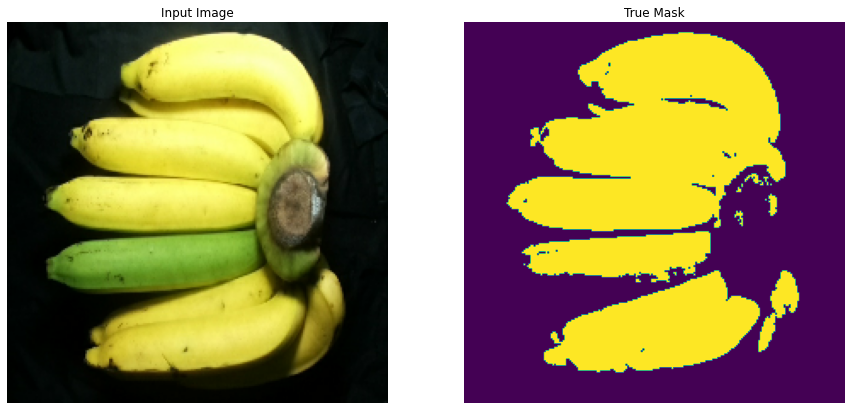

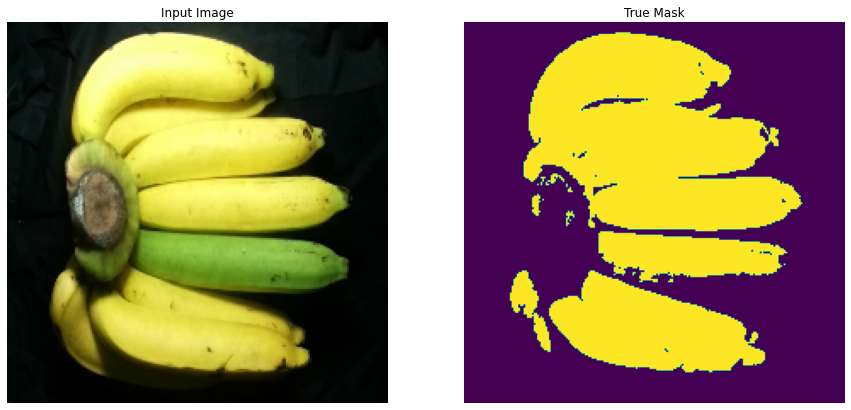

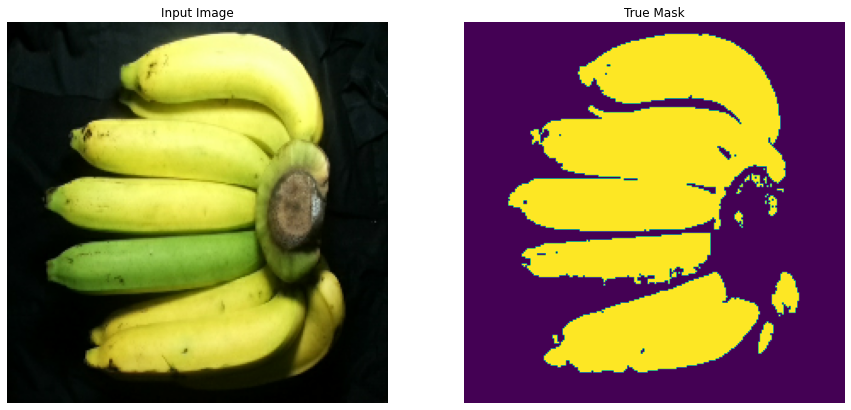

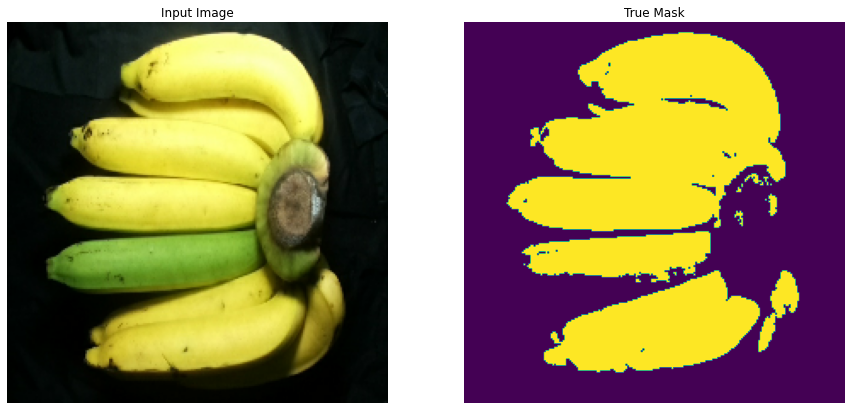

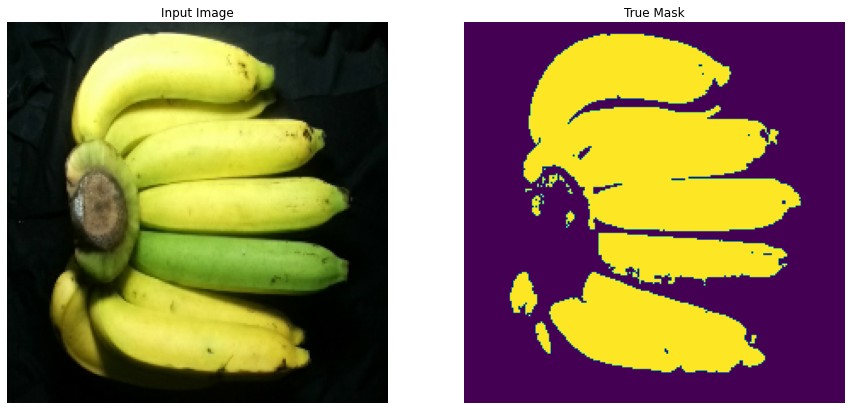

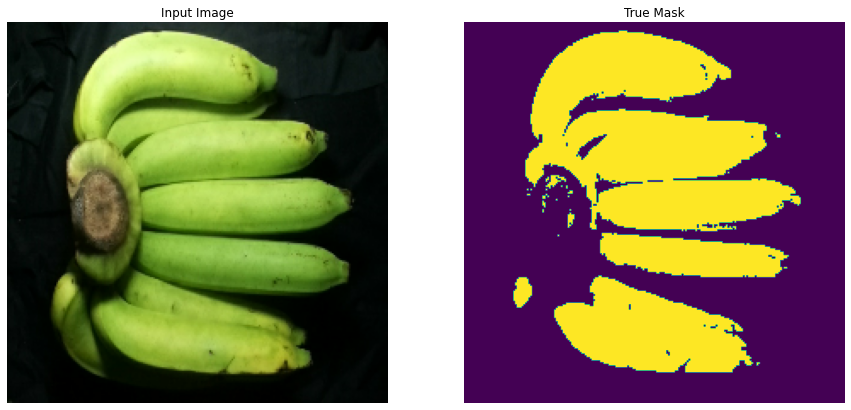

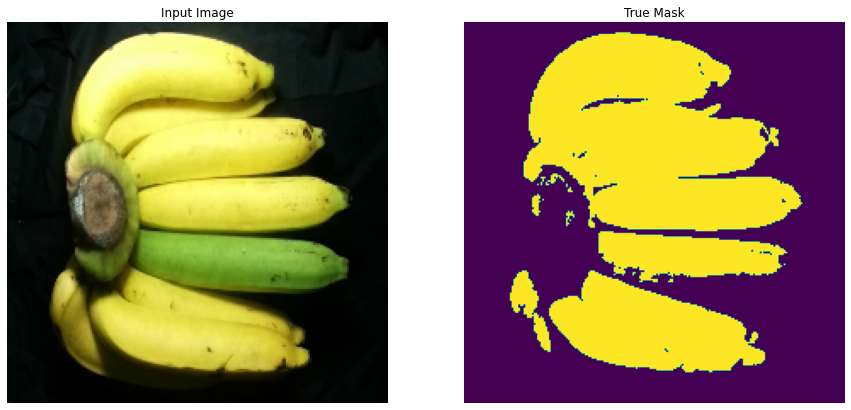

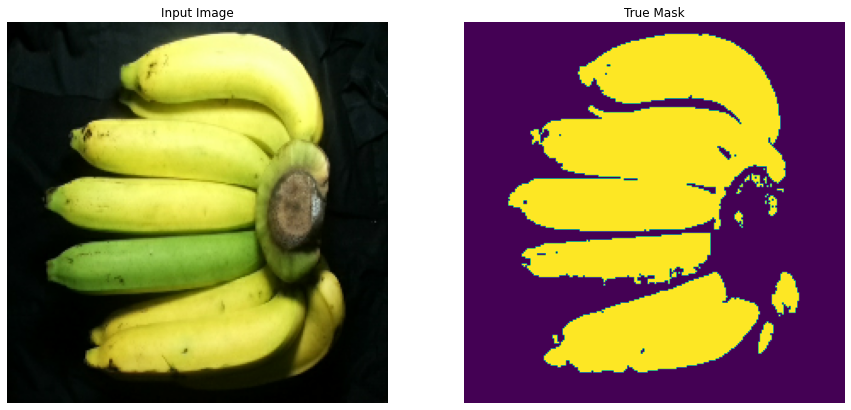

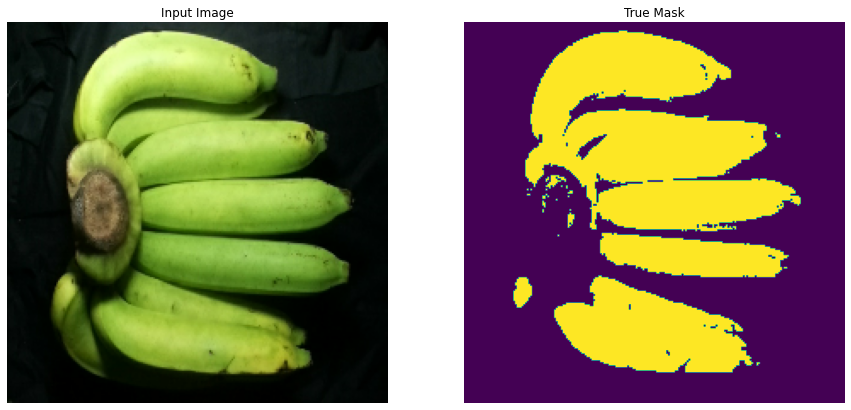

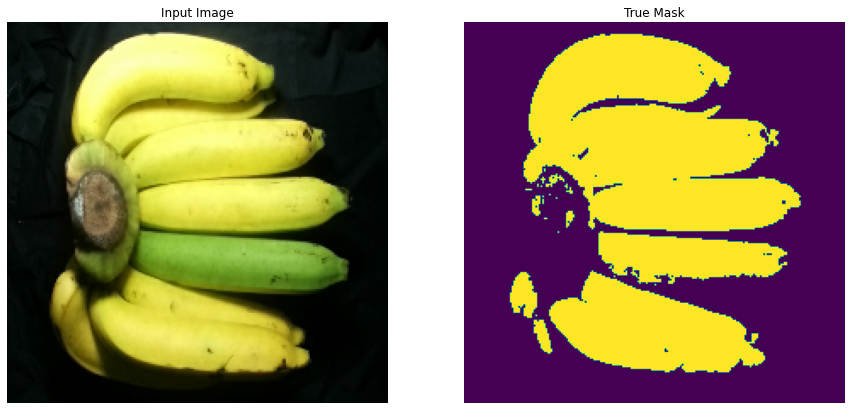

In [55]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

In [56]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

In [57]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [61]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[224, 224, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

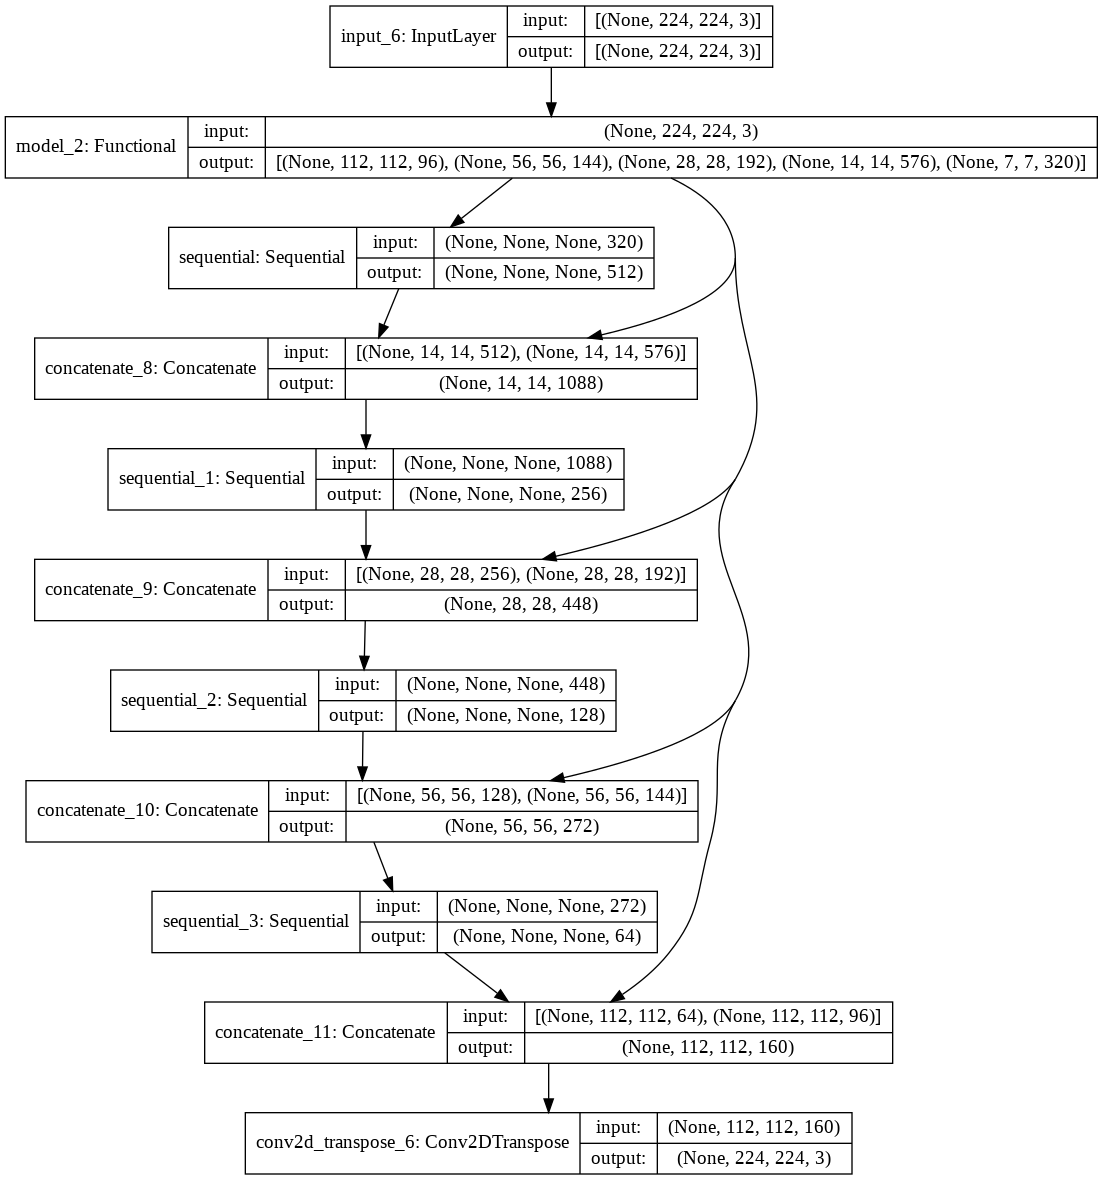

In [63]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

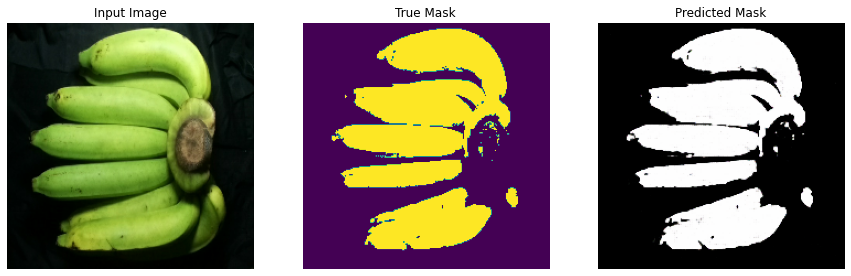

In [71]:
for images, masks in train_dataset.take(10):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [67]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
model_2 (Functional)            [(None, 112, 112, 96 1841984     input_6[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 5 1476608     model_2[2][4]                    
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 14, 14, 1088) 0           sequential[2][0]                 
                                                                 model_2[2][3]              

Epoch 1/50
14/14 [==============================] - 2s 119ms/step - loss: -0.4739 - dice_coef: 1.4739 - binary_accuracy: 0.9857 - val_loss: -0.4662 - val_dice_coef: 1.4666 - val_binary_accuracy: 0.9793
Epoch 2/50
14/14 [==============================] - 1s 109ms/step - loss: -0.4746 - dice_coef: 1.4746 - binary_accuracy: 0.9858 - val_loss: -0.4677 - val_dice_coef: 1.4682 - val_binary_accuracy: 0.9804
Epoch 3/50


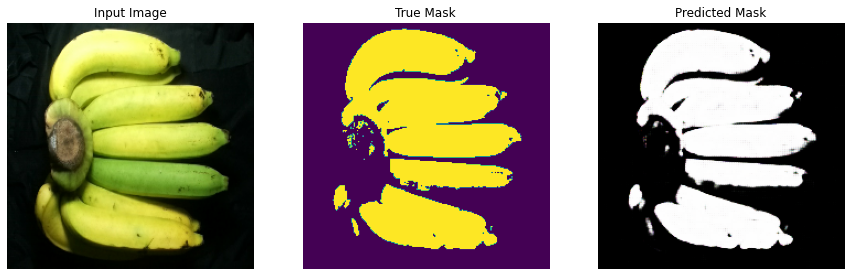

14/14 [==============================] - 2s 108ms/step - loss: -0.4751 - dice_coef: 1.4751 - binary_accuracy: 0.9856 - val_loss: -0.4697 - val_dice_coef: 1.4702 - val_binary_accuracy: 0.9831
Epoch 4/50
14/14 [==============================] - 2s 109ms/step - loss: -0.4763 - dice_coef: 1.4762 - binary_accuracy: 0.9867 - val_loss: -0.4711 - val_dice_coef: 1.4716 - val_binary_accuracy: 0.9844
Epoch 5/50
14/14 [==============================] - 2s 109ms/step - loss: -0.4770 - dice_coef: 1.4770 - binary_accuracy: 0.9870 - val_loss: -0.4678 - val_dice_coef: 1.4682 - val_binary_accuracy: 0.9776
Epoch 6/50


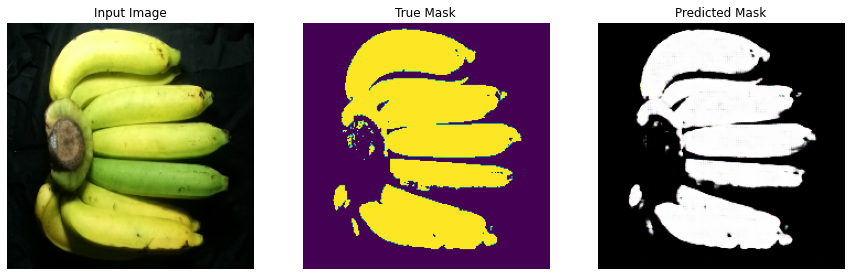

14/14 [==============================] - 2s 108ms/step - loss: -0.4778 - dice_coef: 1.4777 - binary_accuracy: 0.9869 - val_loss: -0.4721 - val_dice_coef: 1.4726 - val_binary_accuracy: 0.9853
Epoch 7/50
14/14 [==============================] - 2s 108ms/step - loss: -0.4774 - dice_coef: 1.4771 - binary_accuracy: 0.9873 - val_loss: -0.4713 - val_dice_coef: 1.4719 - val_binary_accuracy: 0.9858
Epoch 8/50
14/14 [==============================] - 2s 108ms/step - loss: -0.4790 - dice_coef: 1.4791 - binary_accuracy: 0.9880 - val_loss: -0.4706 - val_dice_coef: 1.4710 - val_binary_accuracy: 0.9787
Epoch 9/50


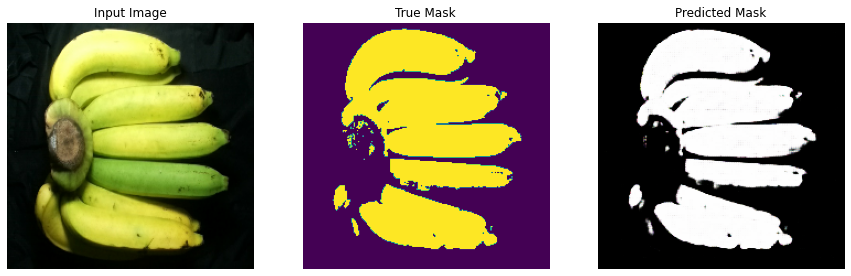

14/14 [==============================] - 2s 111ms/step - loss: -0.4798 - dice_coef: 1.4798 - binary_accuracy: 0.9882 - val_loss: -0.4737 - val_dice_coef: 1.4742 - val_binary_accuracy: 0.9825
Epoch 10/50
14/14 [==============================] - 2s 111ms/step - loss: -0.4806 - dice_coef: 1.4806 - binary_accuracy: 0.9889 - val_loss: -0.4742 - val_dice_coef: 1.4748 - val_binary_accuracy: 0.9841
Epoch 11/50
14/14 [==============================] - 2s 108ms/step - loss: -0.4804 - dice_coef: 1.4803 - binary_accuracy: 0.9885 - val_loss: -0.4753 - val_dice_coef: 1.4759 - val_binary_accuracy: 0.9862
Epoch 12/50


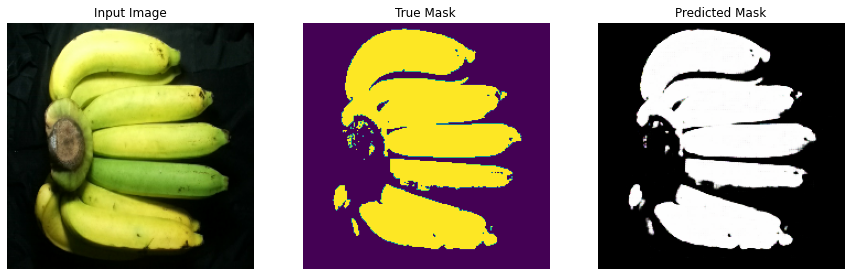

14/14 [==============================] - 2s 109ms/step - loss: -0.4813 - dice_coef: 1.4813 - binary_accuracy: 0.9891 - val_loss: -0.4747 - val_dice_coef: 1.4753 - val_binary_accuracy: 0.9839
Epoch 13/50
14/14 [==============================] - 2s 110ms/step - loss: -0.4812 - dice_coef: 1.4812 - binary_accuracy: 0.9893 - val_loss: -0.4711 - val_dice_coef: 1.4716 - val_binary_accuracy: 0.9781
Epoch 14/50
14/14 [==============================] - 2s 109ms/step - loss: -0.4817 - dice_coef: 1.4816 - binary_accuracy: 0.9888 - val_loss: -0.4751 - val_dice_coef: 1.4757 - val_binary_accuracy: 0.9841
Epoch 15/50


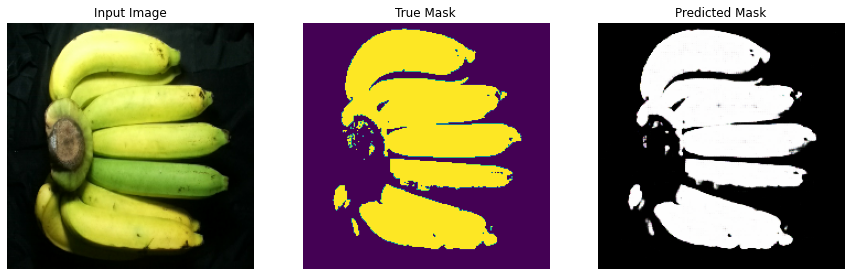

14/14 [==============================] - 2s 112ms/step - loss: -0.4822 - dice_coef: 1.4822 - binary_accuracy: 0.9895 - val_loss: -0.4765 - val_dice_coef: 1.4771 - val_binary_accuracy: 0.9848
Epoch 16/50
14/14 [==============================] - 2s 115ms/step - loss: -0.4828 - dice_coef: 1.4828 - binary_accuracy: 0.9897 - val_loss: -0.4763 - val_dice_coef: 1.4770 - val_binary_accuracy: 0.9885
Epoch 17/50
14/14 [==============================] - 2s 115ms/step - loss: -0.4828 - dice_coef: 1.4827 - binary_accuracy: 0.9900 - val_loss: -0.4781 - val_dice_coef: 1.4787 - val_binary_accuracy: 0.9855
Epoch 18/50


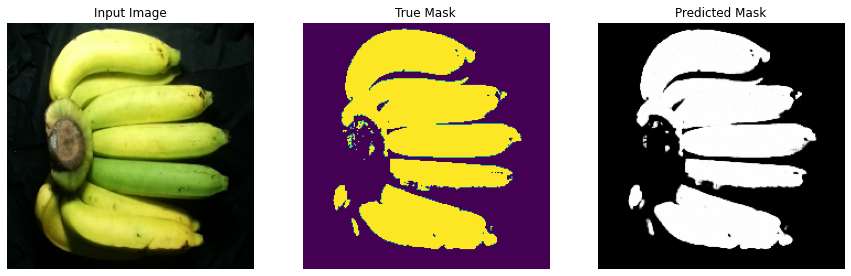

14/14 [==============================] - 2s 113ms/step - loss: -0.4840 - dice_coef: 1.4840 - binary_accuracy: 0.9905 - val_loss: -0.4775 - val_dice_coef: 1.4781 - val_binary_accuracy: 0.9847
Epoch 19/50
14/14 [==============================] - 2s 111ms/step - loss: -0.4834 - dice_coef: 1.4834 - binary_accuracy: 0.9901 - val_loss: -0.4781 - val_dice_coef: 1.4787 - val_binary_accuracy: 0.9858
Epoch 20/50
14/14 [==============================] - 2s 109ms/step - loss: -0.4836 - dice_coef: 1.4836 - binary_accuracy: 0.9904 - val_loss: -0.4771 - val_dice_coef: 1.4776 - val_binary_accuracy: 0.9835
Epoch 21/50


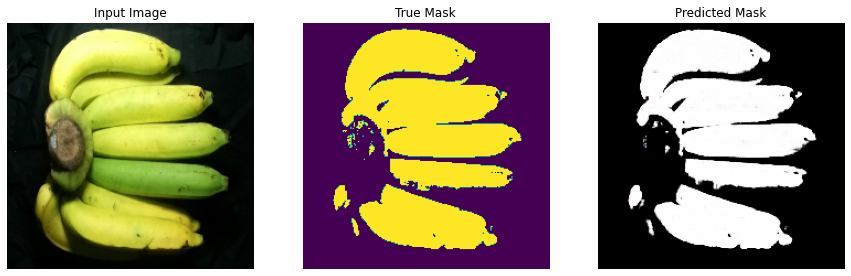

14/14 [==============================] - 2s 113ms/step - loss: -0.4843 - dice_coef: 1.4844 - binary_accuracy: 0.9905 - val_loss: -0.4783 - val_dice_coef: 1.4789 - val_binary_accuracy: 0.9849
Epoch 22/50
14/14 [==============================] - 2s 111ms/step - loss: -0.4831 - dice_coef: 1.4829 - binary_accuracy: 0.9898 - val_loss: -0.4789 - val_dice_coef: 1.4795 - val_binary_accuracy: 0.9881
Epoch 23/50
14/14 [==============================] - 2s 115ms/step - loss: -0.4842 - dice_coef: 1.4843 - binary_accuracy: 0.9903 - val_loss: -0.4794 - val_dice_coef: 1.4800 - val_binary_accuracy: 0.9874
Epoch 24/50


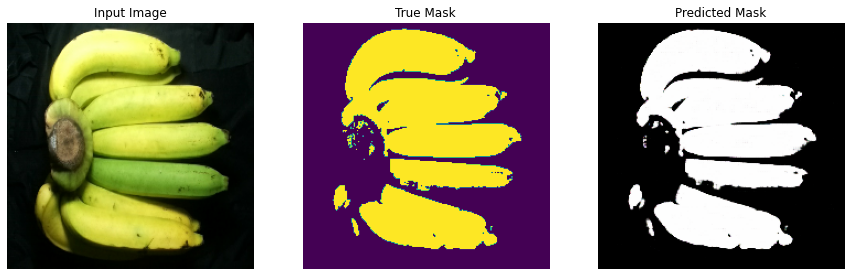

14/14 [==============================] - 2s 113ms/step - loss: -0.4847 - dice_coef: 1.4847 - binary_accuracy: 0.9908 - val_loss: -0.4782 - val_dice_coef: 1.4788 - val_binary_accuracy: 0.9850
Epoch 25/50
14/14 [==============================] - 2s 112ms/step - loss: -0.4851 - dice_coef: 1.4851 - binary_accuracy: 0.9911 - val_loss: -0.4789 - val_dice_coef: 1.4795 - val_binary_accuracy: 0.9864
Epoch 26/50
14/14 [==============================] - 2s 110ms/step - loss: -0.4852 - dice_coef: 1.4851 - binary_accuracy: 0.9908 - val_loss: -0.4792 - val_dice_coef: 1.4797 - val_binary_accuracy: 0.9863
Epoch 27/50


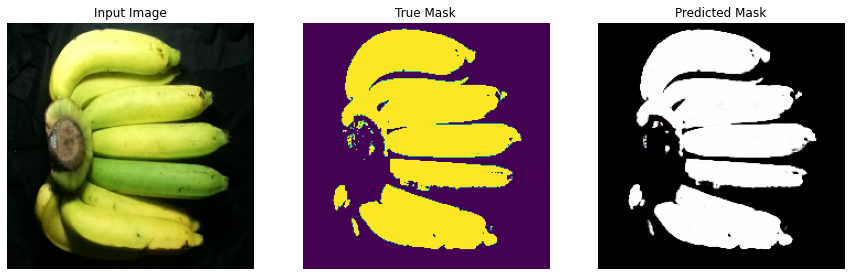

14/14 [==============================] - 2s 110ms/step - loss: -0.4854 - dice_coef: 1.4854 - binary_accuracy: 0.9911 - val_loss: -0.4797 - val_dice_coef: 1.4804 - val_binary_accuracy: 0.9891
Epoch 28/50
14/14 [==============================] - 2s 112ms/step - loss: -0.4854 - dice_coef: 1.4854 - binary_accuracy: 0.9912 - val_loss: -0.4801 - val_dice_coef: 1.4808 - val_binary_accuracy: 0.9889
Epoch 29/50
14/14 [==============================] - 2s 113ms/step - loss: -0.4857 - dice_coef: 1.4857 - binary_accuracy: 0.9911 - val_loss: -0.4810 - val_dice_coef: 1.4816 - val_binary_accuracy: 0.9884
Epoch 30/50


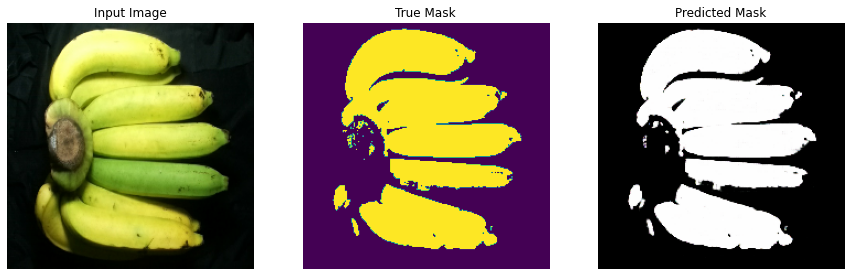

14/14 [==============================] - 2s 113ms/step - loss: -0.4859 - dice_coef: 1.4859 - binary_accuracy: 0.9915 - val_loss: -0.4807 - val_dice_coef: 1.4814 - val_binary_accuracy: 0.9892
Epoch 31/50
14/14 [==============================] - 2s 113ms/step - loss: -0.4860 - dice_coef: 1.4860 - binary_accuracy: 0.9914 - val_loss: -0.4813 - val_dice_coef: 1.4820 - val_binary_accuracy: 0.9880
Epoch 32/50
14/14 [==============================] - 2s 116ms/step - loss: -0.4862 - dice_coef: 1.4861 - binary_accuracy: 0.9917 - val_loss: -0.4792 - val_dice_coef: 1.4798 - val_binary_accuracy: 0.9845
Epoch 33/50


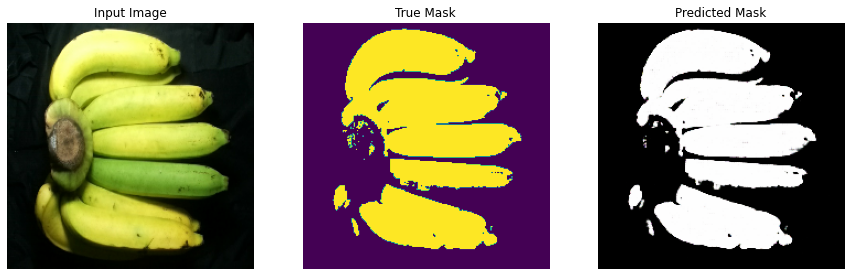

14/14 [==============================] - 2s 110ms/step - loss: -0.4865 - dice_coef: 1.4865 - binary_accuracy: 0.9916 - val_loss: -0.4797 - val_dice_coef: 1.4803 - val_binary_accuracy: 0.9857
Epoch 34/50
14/14 [==============================] - 2s 114ms/step - loss: -0.4871 - dice_coef: 1.4871 - binary_accuracy: 0.9919 - val_loss: -0.4810 - val_dice_coef: 1.4816 - val_binary_accuracy: 0.9864
Epoch 35/50
14/14 [==============================] - 2s 113ms/step - loss: -0.4864 - dice_coef: 1.4865 - binary_accuracy: 0.9917 - val_loss: -0.4816 - val_dice_coef: 1.4823 - val_binary_accuracy: 0.9885
Epoch 36/50


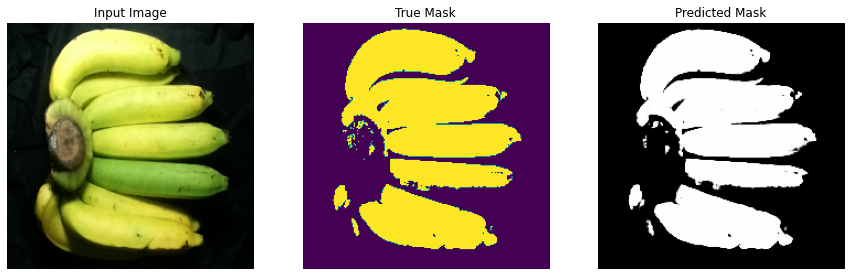

14/14 [==============================] - 2s 111ms/step - loss: -0.4872 - dice_coef: 1.4873 - binary_accuracy: 0.9922 - val_loss: -0.4816 - val_dice_coef: 1.4823 - val_binary_accuracy: 0.9878
Epoch 37/50
14/14 [==============================] - 2s 112ms/step - loss: -0.4875 - dice_coef: 1.4876 - binary_accuracy: 0.9922 - val_loss: -0.4806 - val_dice_coef: 1.4812 - val_binary_accuracy: 0.9858
Epoch 38/50
14/14 [==============================] - 2s 114ms/step - loss: -0.4877 - dice_coef: 1.4877 - binary_accuracy: 0.9923 - val_loss: -0.4817 - val_dice_coef: 1.4824 - val_binary_accuracy: 0.9879
Epoch 39/50


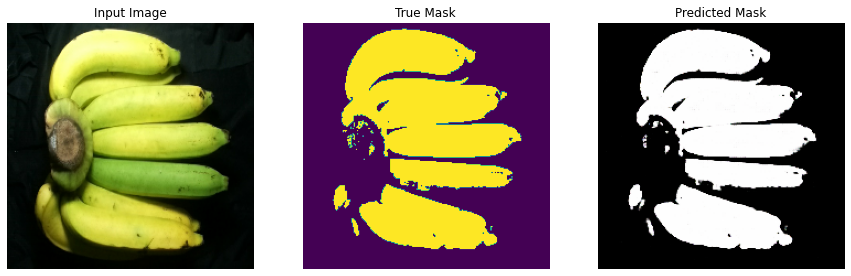

14/14 [==============================] - 2s 112ms/step - loss: -0.4875 - dice_coef: 1.4876 - binary_accuracy: 0.9925 - val_loss: -0.4778 - val_dice_coef: 1.4784 - val_binary_accuracy: 0.9824
Epoch 40/50
14/14 [==============================] - 2s 111ms/step - loss: -0.4873 - dice_coef: 1.4873 - binary_accuracy: 0.9919 - val_loss: -0.4822 - val_dice_coef: 1.4829 - val_binary_accuracy: 0.9894
Epoch 41/50
14/14 [==============================] - 2s 114ms/step - loss: -0.4879 - dice_coef: 1.4880 - binary_accuracy: 0.9927 - val_loss: -0.4815 - val_dice_coef: 1.4821 - val_binary_accuracy: 0.9865
Epoch 42/50


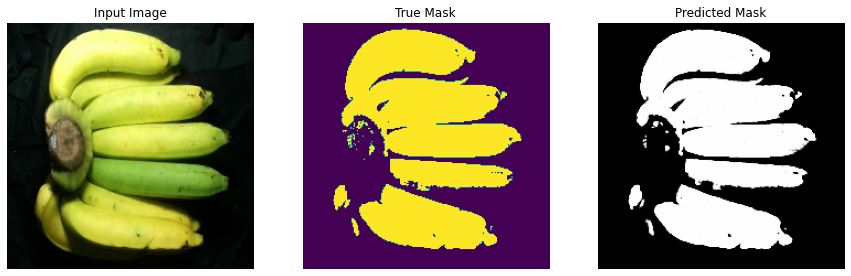

14/14 [==============================] - 2s 114ms/step - loss: -0.4880 - dice_coef: 1.4881 - binary_accuracy: 0.9924 - val_loss: -0.4820 - val_dice_coef: 1.4828 - val_binary_accuracy: 0.9902
Epoch 43/50
14/14 [==============================] - 2s 114ms/step - loss: -0.4883 - dice_coef: 1.4883 - binary_accuracy: 0.9928 - val_loss: -0.4825 - val_dice_coef: 1.4832 - val_binary_accuracy: 0.9882
Epoch 44/50
14/14 [==============================] - 2s 111ms/step - loss: -0.4883 - dice_coef: 1.4883 - binary_accuracy: 0.9928 - val_loss: -0.4809 - val_dice_coef: 1.4817 - val_binary_accuracy: 0.9906
Epoch 45/50


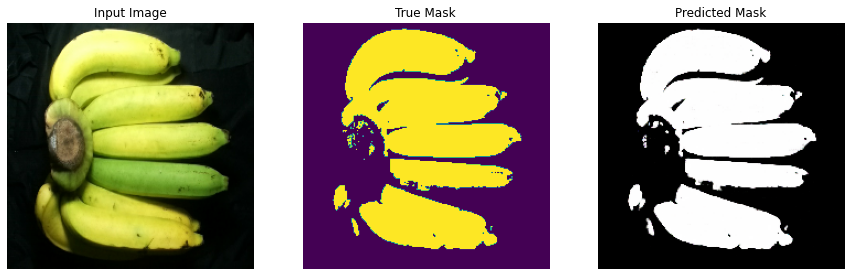

14/14 [==============================] - 2s 115ms/step - loss: -0.4882 - dice_coef: 1.4882 - binary_accuracy: 0.9926 - val_loss: -0.4822 - val_dice_coef: 1.4829 - val_binary_accuracy: 0.9891
Epoch 46/50
14/14 [==============================] - 2s 117ms/step - loss: -0.4886 - dice_coef: 1.4886 - binary_accuracy: 0.9929 - val_loss: -0.4819 - val_dice_coef: 1.4827 - val_binary_accuracy: 0.9908
Epoch 47/50
14/14 [==============================] - 2s 118ms/step - loss: -0.4885 - dice_coef: 1.4885 - binary_accuracy: 0.9929 - val_loss: -0.4817 - val_dice_coef: 1.4824 - val_binary_accuracy: 0.9868


In [69]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 50
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])

In [73]:
def loadTestImageFromPath(banana_path):
  banana_img = tf.io.read_file(banana_path) 
  banana_img = tf.image.decode_jpeg(banana_img, channels=3)
  banana_img = tf.image.resize(banana_img, img_size)
  banana_img = tf.cast(banana_img, tf.float32) / 255.0
  return banana_img

In [74]:
test_img1 = loadTestImageFromPath('/content/test1.jpg')
test_img2 = loadTestImageFromPath('/content/test2.jpg')

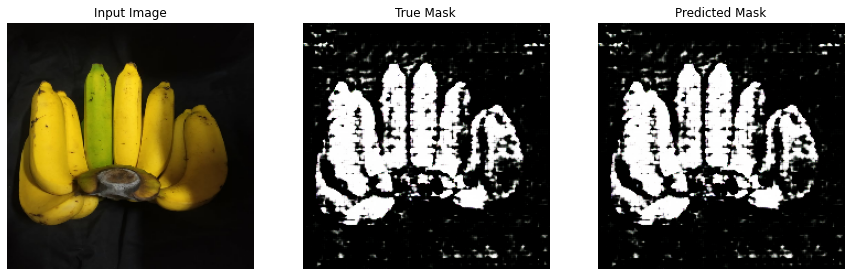

In [78]:
predict_test_img1 = model.predict(test_img1[tf.newaxis, ...])
predict_test_img1 = predict_test_img1.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
visualize([test_img1, predict_test_img1, predict_test_img1])

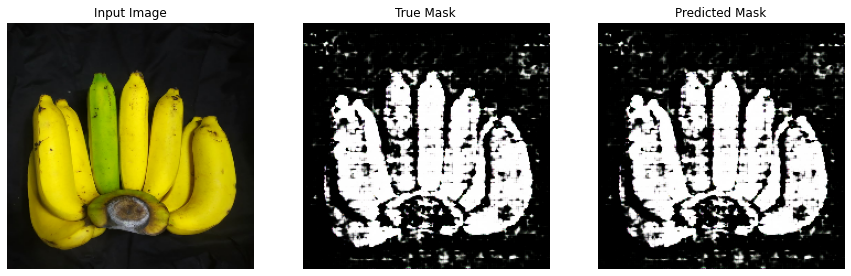

In [80]:
predict_test_img2 = model.predict(test_img2[tf.newaxis, ...])
predict_test_img2 = predict_test_img2.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
visualize([test_img2, predict_test_img2, predict_test_img2])

In [82]:
test_img3 = loadTestImageFromPath('/content/unnamed.png')

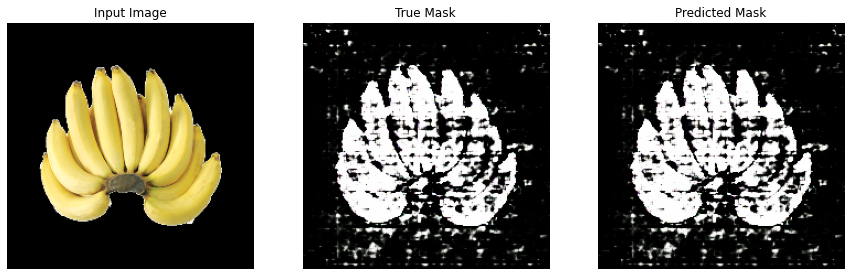

In [83]:
predict_test_img3 = model.predict(test_img3[tf.newaxis, ...])
predict_test_img3 = predict_test_img3.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
visualize([test_img3, predict_test_img3, predict_test_img3])

In [85]:
def predictAndVisualize(paths):
  for img_path in paths:
    print(img_path)
    img = loadTestImageFromPath(img_path)
    predict_img = model.predict(img[tf.newaxis, ...])
    predict_img = predict_img.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
    visualize([img, predict_img, predict_img])


t1.jpg


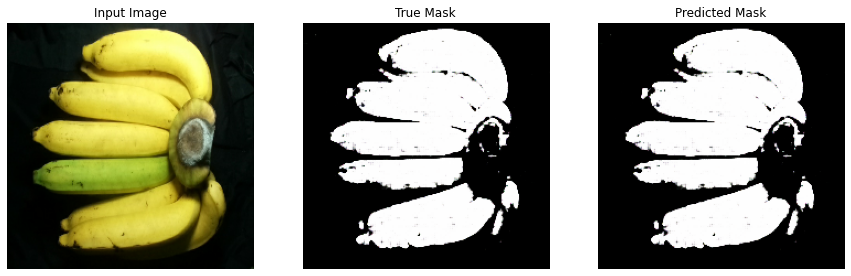

t2.jpg


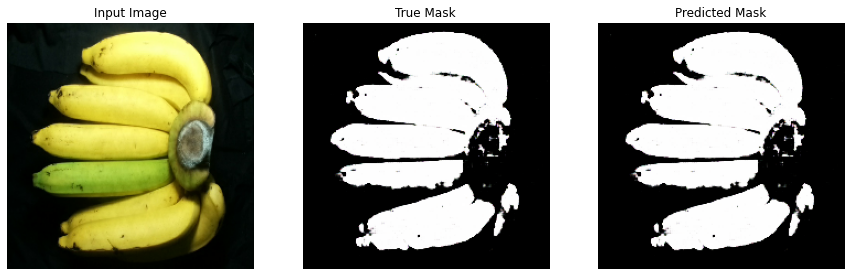

t3.jpg


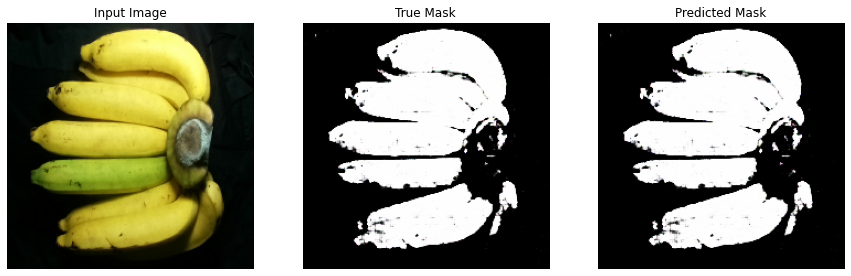

t4.jpg


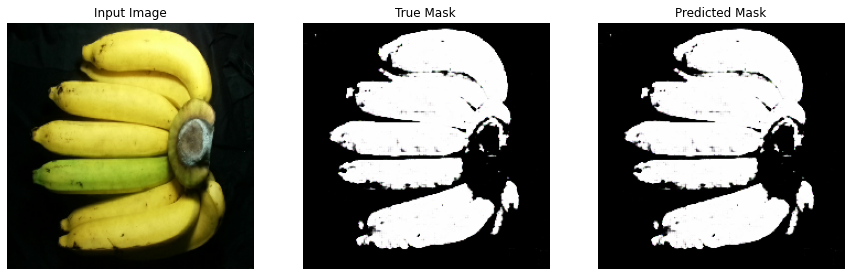

t5.jpg


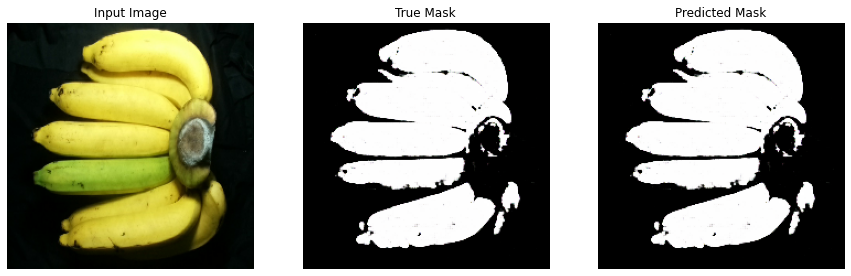

In [86]:
predictAndVisualize(['t1.jpg','t2.jpg','t3.jpg','t4.jpg','t5.jpg'])

In [88]:
model.save('/content/50epMobileNetV2_224x224.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Reloaded Model

In [91]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

reloaded_model = tf.keras.models.load_model('/content/50epMobileNetV2_224x224.hdf5',custom_objects={'dice_loss': dice_loss,'dice_coef': dice_coef})

In [92]:
def predictAndVisualize_reloaded_model(paths):
  for img_path in paths:
    print(img_path)
    img = loadTestImageFromPath(img_path)
    predict_img = reloaded_model.predict(img[tf.newaxis, ...])
    predict_img = predict_img.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
    visualize([img, predict_img, predict_img])

t1.jpg


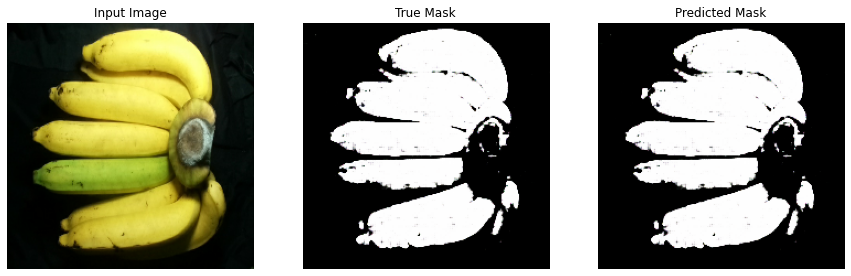

t2.jpg


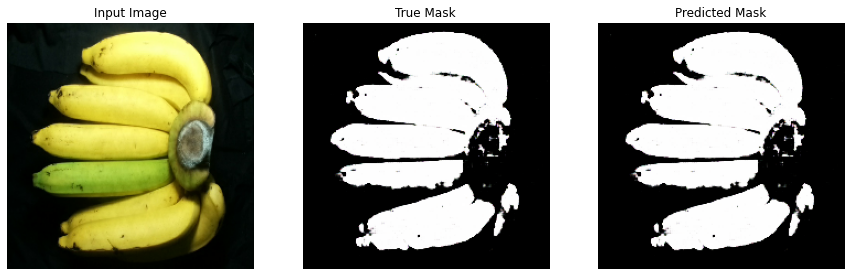

t3.jpg


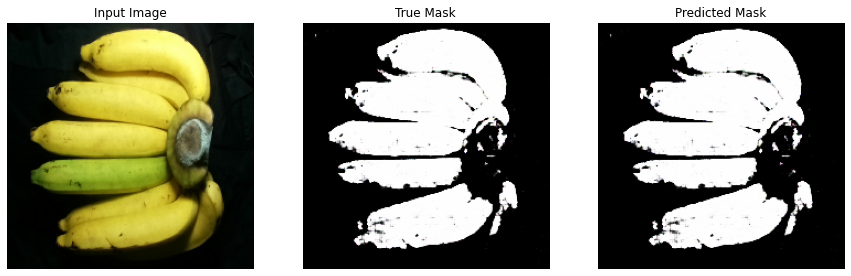

t4.jpg


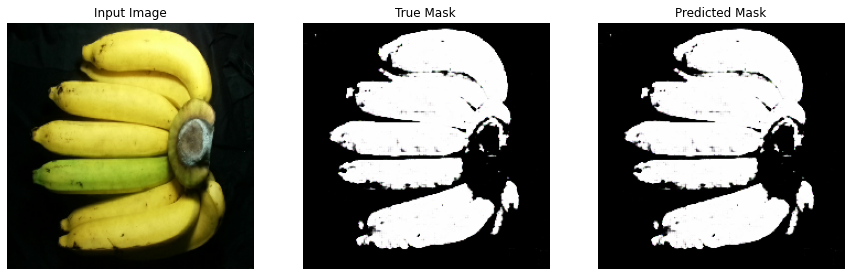

t5.jpg


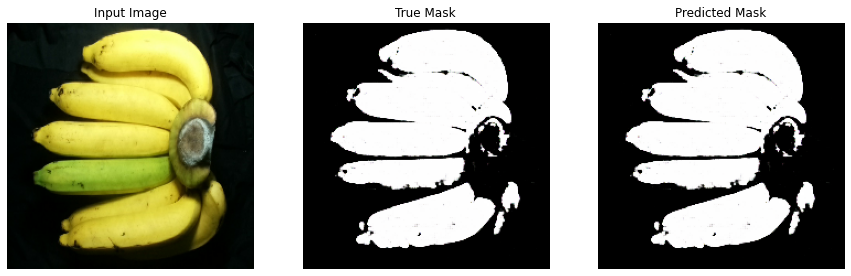

In [93]:
predictAndVisualize_reloaded_model(['t1.jpg','t2.jpg','t3.jpg','t4.jpg','t5.jpg'])

# Test on Local

In [16]:
OUTPUT_CLASSES = 3
img_size = (224,224)
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()
def loadTestImageFromPath(banana_path):
  banana_img = tf.io.read_file(banana_path) 
  banana_img = tf.image.decode_jpeg(banana_img, channels=3)
  banana_img = tf.image.resize(banana_img, img_size)
  banana_img = tf.cast(banana_img, tf.float32) / 255.0
  return banana_img

In [5]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

loaded_model = tf.keras.models.load_model('./segment_model/50epMobileNetV2_224x224.hdf5',custom_objects={'dice_loss': dice_loss,'dice_coef': dice_coef})

In [7]:
def predictAndVisualize_loaded_model(paths):
  for img_path in paths:
    print(img_path)
    img = loadTestImageFromPath(img_path)
    predict_img = loaded_model.predict(img[tf.newaxis, ...])
    predict_img = predict_img.reshape(img_size[0],img_size[1],OUTPUT_CLASSES)
    visualize([img, predict_img, predict_img])

./test_banana_21-23/t1.jpg


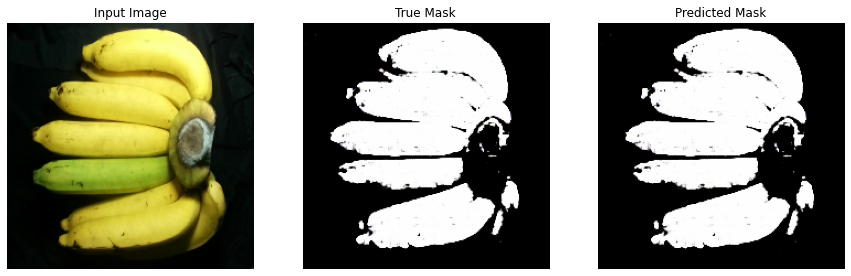

./test_banana_21-23/t2.jpg


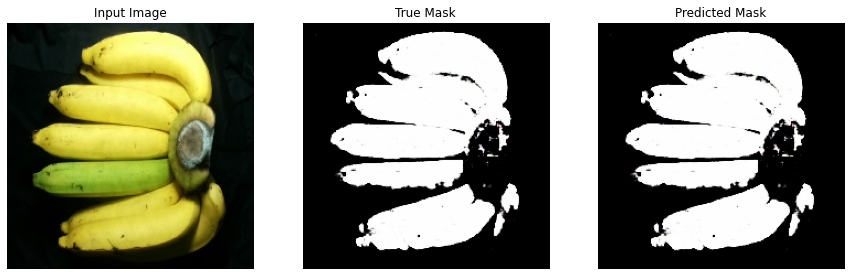

./test_banana_21-23/t3.jpg


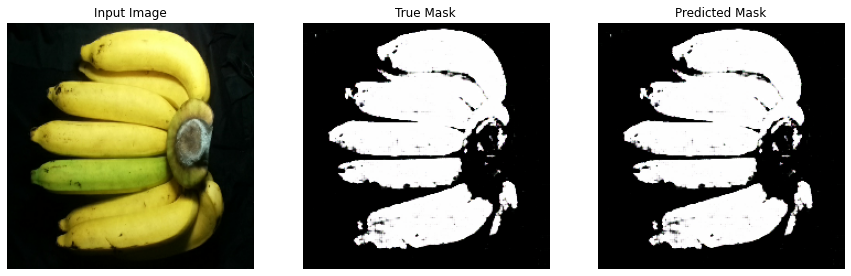

./test_banana_21-23/t4.jpg


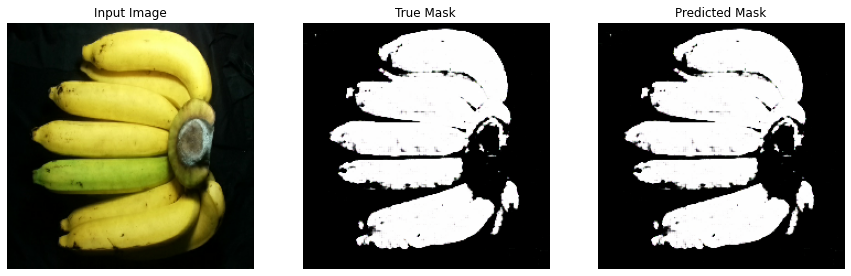

./test_banana_21-23/t5.jpg


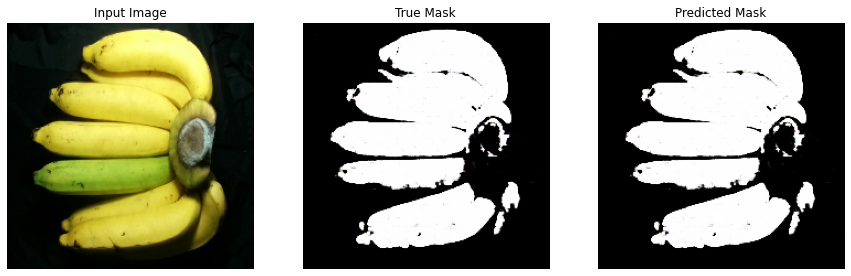

In [17]:
predictAndVisualize_loaded_model(['./test_banana_21-23/t1.jpg','./test_banana_21-23/t2.jpg','./test_banana_21-23/t3.jpg','./test_banana_21-23/t4.jpg','./test_banana_21-23/t5.jpg'])